# 마작 데이터 분석

- 라이브러리 import 및 폰트 설정
- 데이터 경로

In [18]:
import random
import os.path as osp
import os

import cv2
import matplotlib.pyplot as plt

# 폰트 설정
import platform
if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False)

%config InlineBackend.figure_format = 'retina'

img_dir = '../data/mahjong/images'
label_dir = '../data/mahjong/labelling'

## 이미지 견본
이미지는 아이폰 6s 아이폰 se 2020으로 촬영하였다. 

해상도는 3024x4032 혹은 4032x3024이다.

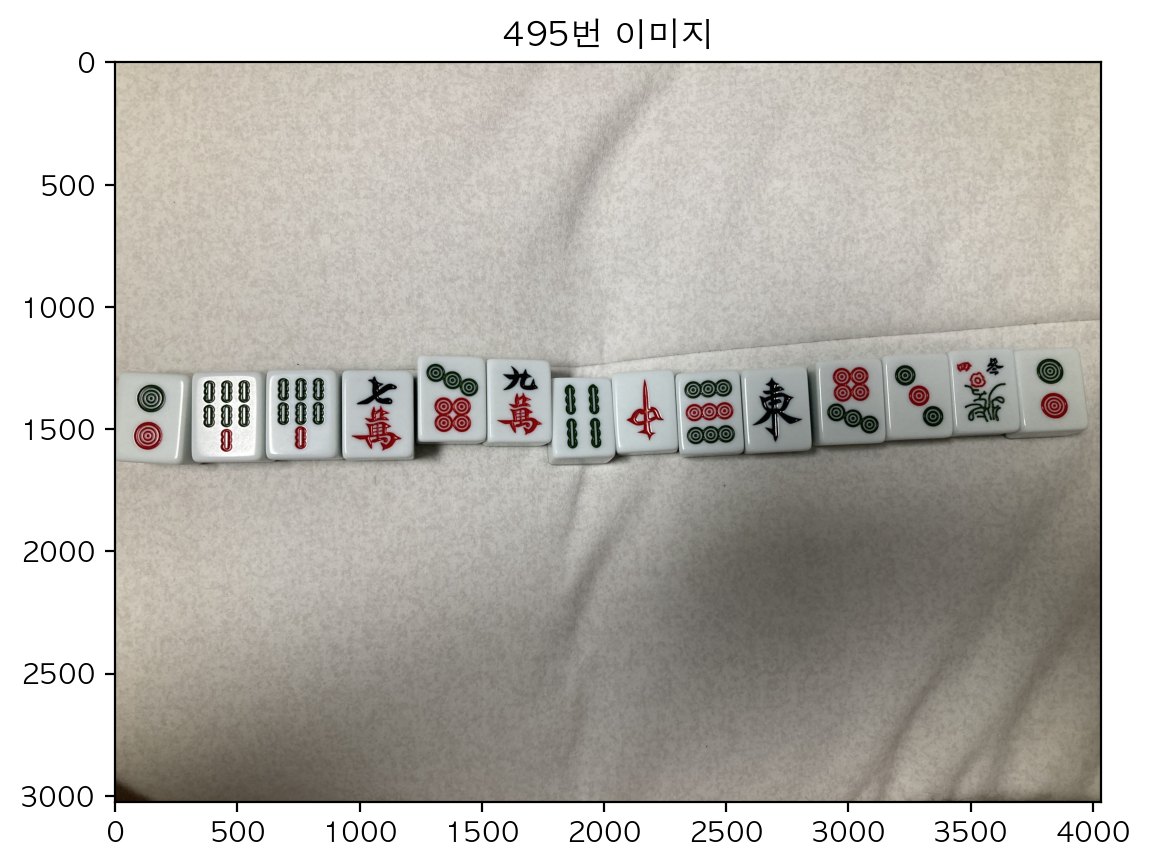

In [17]:
img_num = random.randint(0,500)

img_name = f'{img_num:04}.jpeg'
img = cv2.imread(osp.join(img_dir, img_name))
# rgb 반전
img = img[...,::-1]

plt.imshow(img)
plt.title(f'{img_num}번 이미지')
plt.show()

# 클래스 분포 확인

In [30]:
label_list = [ name for name in os.listdir(label_dir) if name[0] != 'c' and name.endswith('.txt')]
label_dict = {}
for label in label_list:
    with open(osp.join(label_dir, label), 'r') as f:
        content = f.read().split('\n')
    
    tmp = []
    for line in content[:-1]:
        line = list(map(float, line.split()))
        class_idx = int(line[0])
        coord_label = line[1:]
        tmp.append((class_idx, coord_label))
    
    label_dict[int(label[:-4])] = tmp

for cls, coord in label_dict[1]:
    print('클래스: ', cls)
    print('coord:', coord)

클래스:  18
coord: [0.392857, 0.395999, 0.116567, 0.192791]
클래스:  11
coord: [0.503968, 0.344742, 0.135913, 0.163029]
클래스:  8
coord: [0.572917, 0.47338, 0.137897, 0.151786]
클래스:  27
coord: [0.476066, 0.661045, 0.164435, 0.220899]


In [35]:
cls_list = osp.join(label_dir ,'classes.txt')
with open(cls_list, 'r') as f:
    cls_list = f.read().split('\n')[:-1]

for i, cls_name in enumerate(cls_list[:5]):
    print(i,'번 ', cls_name)

0 번  baek
1 번  1tong
2 번  2tong
3 번  3tong
4 번  4tong


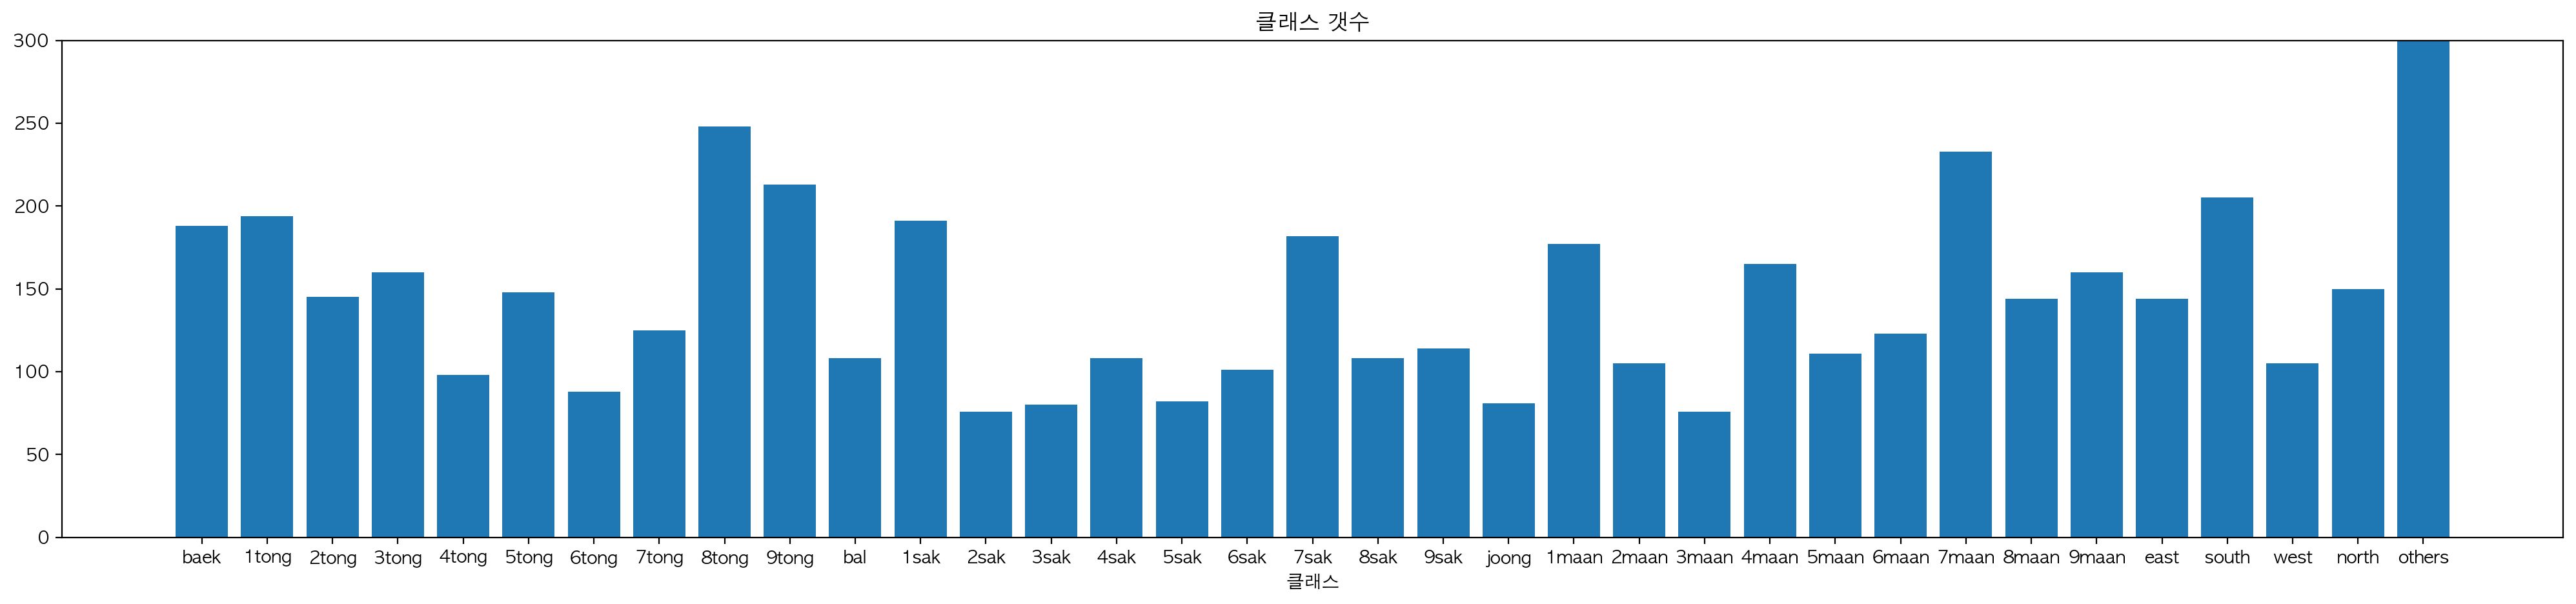

In [89]:
from collections import defaultdict
cls_num = defaultdict(int)

for labels in label_dict.values():
    for cls, _ in labels:
        cls_num[cls_list[cls]] += 1

plt.figure(figsize=(25,5))
plt.ylim(0, 300)
plt.bar(cls_list,[cls_num[cls] for cls in cls_list])
plt.title('클래스 갯수')
plt.xlabel('클래스')
plt.show()